# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

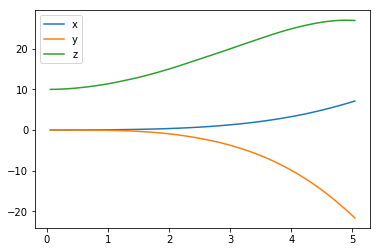

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

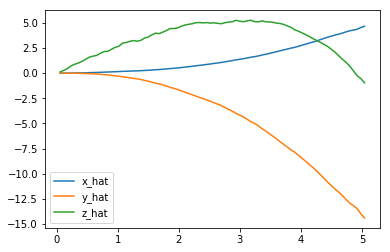

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

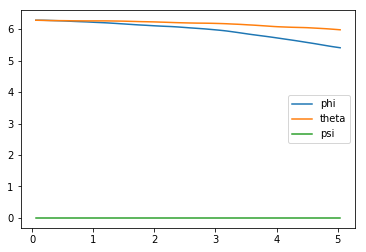

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

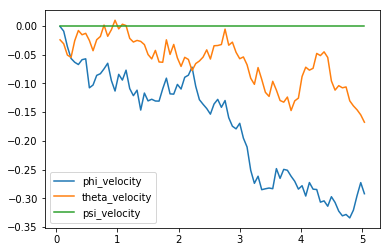

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

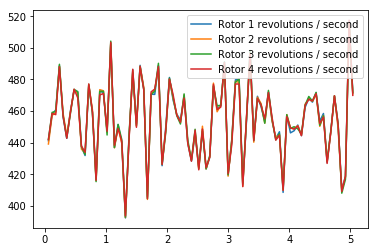

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  7.13006696 -21.6357906   26.94981825   5.40887497   5.97953171
   0.        ]
[  4.66052967 -14.384095    -0.95798005]
[-0.29192321 -0.16764266  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

In [3]:
# Just doing some poking to see that things work as expected.
from hover_task import HoverTask
import numpy as np
test_task = HoverTask()
test_task.get_reward()
print(test_task.sim.pose)
rotor_speeds = np.array((450,450,450,450))
count = 0
done = False
while not done:
    next_state, reward, done = test_task.step(rotor_speeds)
    count += 1
    if count % 10 == 0:
        print('After {} steps'.format(count))
        print('Pose: {} \nV: {} \nAngular_V: {}'.format(test_task.sim.pose, test_task.sim.v,test_task.sim.angular_v))
        print('Reward Components: {}'.format(test_task.get_reward_components()))
        print('Reward Weights: {}'.format(test_task.reward_weights))
        print('Reward: {}'.format(reward))
        print('Next State: {}'.format(next_state.reshape(3,12)))
print('Done after {} steps. Final pose: {}'.format(count,test_task.sim.pose))


[ 0.  0. 10.  0.  0.  0.]
After 10 steps
Pose: [ 0.          0.         10.42290445  0.          0.          0.        ] 
V: [0.         0.         1.40015042] 
Angular_V: [0. 0. 0.]
Reward Components: (1, 0.1788481742818929, 1.960421195399411, 0.0)
Reward Weights: [10.  0. -2. -1.]
Reward: 18.98141791824273
Next State: [[ 0.          0.         10.36871847  0.          0.          0.
   0.          0.          1.30908863  0.          0.          0.        ]
 [ 0.          0.         10.39535615  0.          0.          0.
   0.          0.          1.35467959  0.          0.          0.        ]
 [ 0.          0.         10.42290445  0.          0.          0.
   0.          0.          1.40015042  0.          0.          0.        ]]
After 20 steps
Pose: [ 0.          0.         11.65821187  0.          0.          0.        ] 
V: [0.        0.        2.6916347] 
Angular_V: [0. 0. 0.]
Reward Components: (1, 2.7496666121471245, 7.244897352650042, 0.0)
Reward Weights: [10.  0. -2. -1.]

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from tasks.default_task import DefaultTask

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
default_task = DefaultTask(target_pos=target_pos)
policy_search_agent = PolicySearch_Agent(default_task) 

for i_episode in range(1, num_episodes+1):
    state = policy_search_agent.reset_episode() # start a new episode
    while True:
        action = policy_search_agent.act(state) 
        next_state, reward, done = task.step(action)
        policy_search_agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, policy_search_agent.score, policy_search_agent.best_score, policy_search_agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

ModuleNotFoundError: No module named 'task'

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [3]:
## TODO: Train your agent here.

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [5]:
## Plot rewards

My first attempt was a bust (see code in agents.ddpg_v1), so anticipating a few revisions, I wrote some helper code to:
- wrap Task in an Env so I can write generic agents
- make a generic Agent with some helper functions to run / train and track progress

Let's test on a random agent to make sure nothing breaks and provide a baseline.

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode: 1000 Steps:       84 Score: -612.4215 (Best: -340.4007) Time: 0.06 Steps/Sec:  14704
== Test Run == Episodes Trained = 1000, Average Score over 5 runs  = -597.877


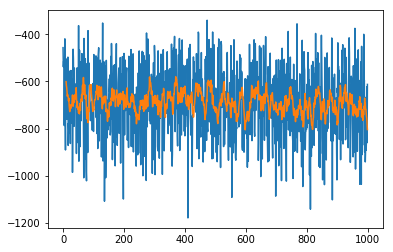

In [1]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper           # Wraps a Task in an Env
from tasks.default_task import DefaultTask           # The original "move to position" Task
from agents.agent import RandomAgent                 # Chooses random actions

env = TaskWrapper(DefaultTask()) 
random_agent = RandomAgent(env)
random_agent.test_every_n_episodes = 1000
random_agent.train(num_episodes=1000)
random_agent.plot_training_scores()

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:  200  Steps:       84  Score: -2053.252 (Best:   10.735)  Time: 1.39s  Steps/Sec:    6090

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D



== Test Run == Episodes Trained =  200, Average Score over 5 runs  = -2040.081
Training Episode:  400  Steps:       23  Score:  -12.918 (Best:   10.735)  Time: 0.29s  Steps/Sec:    784
== Test Run == Episodes Trained =  400, Average Score over 5 runs  = -25.593
Training Episode:  600  Steps:       25  Score:   -7.526 (Best:   11.101)  Time: 0.32s  Steps/Sec:    778
== Test Run == Episodes Trained =  600, Average Score over 5 runs  = -131.371
Training Episode:  800  Steps:       24  Score:  -19.813 (Best:   11.101)  Time: 0.33s  Steps/Sec:    7390
== Test Run == Episodes Trained =  800, Average Score over 5 runs  =  -7.094
Training Episode: 1000  Steps:       24  Score:  -14.172 (Best:   11.101)  Time: 0.32s  Steps/Sec:    7550
== Test Run == Episodes Trained = 1000, Average Score over 5 runs  = -14.864


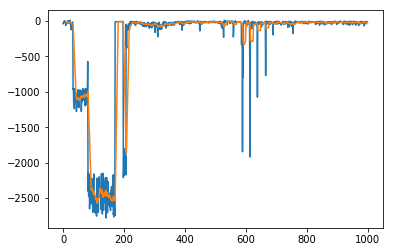

In [1]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper           # Wraps a Task in an Env
from tasks.default_task import DefaultTask           # The original "move to position" Task
from agents.ddpg_v0.ddpg_agent import DDPG as DDPGv0 # Boilerplate DDPG agent that works on Env instead of Task


env = TaskWrapper(DefaultTask()) 
ddpg_v0_agent = DDPGv0(env)
ddpg_v0_agent.test_every_n_episodes = 200
ddpg_v0_agent.train(num_episodes=1000)                 
ddpg_v0_agent.plot_training_scores()     

Well, it definitely does better than Random, so that's something, but it's not exactly killing it.

Let's try it out on Pendulum-v0:

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode: 1000  Steps:   200  Score: -1506.72 (Best:  -719.56)  Time: 0.01s  Steps/Sec: 37771    
== Test Run == Episodes Trained = 1000, Average Score over 5 runs  = -1249.518


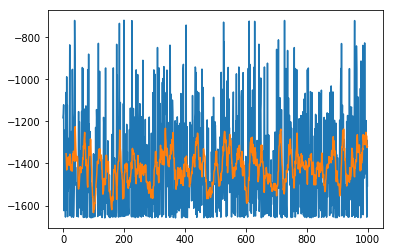

In [7]:
# Random agent for baseline
%matplotlib inline
import gym
from agents.agent import RandomAgent                 # Chooses random actions

pendulum_env = gym.make('Pendulum-v0')
pendulum_RA = RandomAgent(pendulum_env)
pendulum_RA.test_every_n_episodes = 1000
pendulum_RA.train(num_episodes=1000)
pendulum_RA.plot_training_scores()

RandomAgent baseline shows score around -1400.

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:  200  Steps:      200  Score: -1154.874 (Best: -830.273)  Time: 2.60s  Steps/Sec:    767
== Test Run == Episodes Trained =  200, Average Score over 5 runs  = -1278.636
Training Episode:  400  Steps:      200  Score: -1414.290 (Best: -830.273)  Time: 2.46s  Steps/Sec:    81
== Test Run == Episodes Trained =  400, Average Score over 5 runs  = -1330.939
Training Episode:  600  Steps:      200  Score: -1420.786 (Best: -830.273)  Time: 2.42s  Steps/Sec:    82
== Test Run == Episodes Trained =  600, Average Score over 5 runs  = -1287.013
Training Episode:  800  Steps:      200  Score: -1457.299 (Best: -830.273)  Time: 2.57s  Steps/Sec:    77   0
== Test Run == Episodes Trained =  800, Average Score over 5 runs  = -1451.842
Training Episode: 1000  Steps:      200  Score: -1222.313

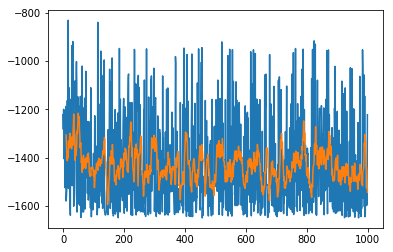

In [2]:
%matplotlib inline
import gym
from agents.ddpg_v0.ddpg_agent import DDPG as DDPGv0 

pendulum_env = gym.make('Pendulum-v0')
pendulum_DDPGv0 = DDPGv0(pendulum_env)
pendulum_DDPGv0.test_every_n_episodes = 200
pendulum_DDPGv0.train(num_episodes=1000)                 
pendulum_DDPGv0.plot_training_scores()   

For v2, taking inspiration from the DDPG paper, I made several changes:
- Use batch normalization after all layers
- Concatenated the action and state pathways rather than adding them
- Added a dense layer after the concatenation
- Set the learning rates as in DDPG paper:
  - 1e-3 for critic
  - 1e-4 for actor
- Used a smaller value of Tau (1e-3)

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:  200  Steps:   200  Score: -1231.62 (Best:  -857.69)  Time: 7.22s  Steps/Sec:    27     
== Test Run == Episodes Trained =  200, Average Score over 5 runs  = -1620.055
Training Episode:  400  Steps:   200  Score: -1605.58 (Best:  -852.99)  Time: 8.10s  Steps/Sec:    24     
== Test Run == Episodes Trained =  400, Average Score over 5 runs  = -1406.058
Training Episode:  500  Steps:   200  Score: -1266.70 (Best:  -779.60)  Time: 6.86s  Steps/Sec:    29    

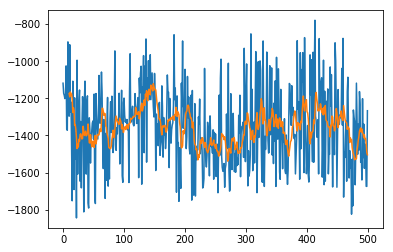

In [1]:
%matplotlib inline
import gym
from agents.ddpg_v2.ddpg_agent import DDPG as DDPGv2 

pendulum_env = gym.make('Pendulum-v0')
pendulum_DDPGv2 = DDPGv2(pendulum_env)
pendulum_DDPGv2.test_every_n_episodes = 200
pendulum_DDPGv2.train(num_episodes=500)                 
pendulum_DDPGv2.plot_training_scores()   

This ran much slower (<30 steps/sec compared to ~80 on my CPU), and it doesn't look like there's much/any improvement over the naive version after 500 episodes.

In the DDPG paper, they use L2 regularization, but since dropout appears to be best practice at this point, I'm going to try adding that and see if it helps.

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:  200  Steps:   200  Score: -1343.90 (Best:  -754.30)  Time: 7.53s  Steps/Sec:    26       
== Test Run == Episodes Trained =  200, Average Score over 5 runs  = -1401.145
Training Episode:  400  Steps:   200  Score: -1503.85 (Best:  -754.30)  Time: 7.97s  Steps/Sec:    25     
== Test Run == Episodes Trained =  400, Average Score over 5 runs  = -1501.760
Training Episode:  500  Steps:   200  Score: -1461.71 (Best:  -754.30)  Time: 8.88s  Steps/Sec:    22    

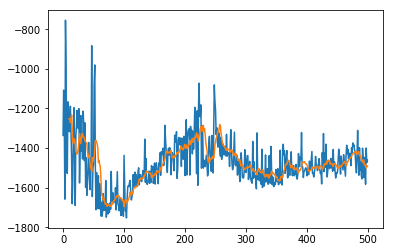

In [2]:
%matplotlib inline
import gym
from agents.ddpg_v3.ddpg_agent import DDPG as DDPGv3

pendulum_env = gym.make('Pendulum-v0')
pendulum_DDPGv3 = DDPGv3(pendulum_env)
pendulum_DDPGv3.test_every_n_episodes = 200
pendulum_DDPGv3.train(num_episodes=500)                 
pendulum_DDPGv3.plot_training_scores()   

In [4]:
pendulum_DDPGv3.run_episode(render=True)

(-1375.6520841427948, 200, 9.923878908157349)

Well, that's not great.  It's less noisy than v2 which is good, but it definitely isn't solving the environment.

The other big differences between this implementation and DDPG are in weight initialization, and in the layers (and sizes) used. I'm a little terrified about execution speed impact of increasing the layers sizes, but hey, YOLO!

In v4, I've copied the layer architecture (including initialization) from the DDPG paper. I've kept the Batch Norm and Dropout for now.


Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:  100  Steps:   200  Score: -1121.14 (Best:  -780.31)  Time: 22.79s  Steps/Sec:     8    
== Test Run == Episodes Trained =  100, Average Score over 5 runs  = -1165.595
Training Episode:  200  Steps:   200  Score: -1504.82 (Best:  -780.31)  Time: 23.89s  Steps/Sec:     8    
== Test Run == Episodes Trained =  200, Average Score over 5 runs  = -1556.465
Training Episode:  300  Steps:   200  Score: -1139.43 (Best:  -780.31)  Time: 23.54s  Steps/Sec:     8    
== Test Run == Episodes Trained =  300, Average Score over 5 runs  = -1261.793
Training Episode:  400  Steps:   200  Score: -1293.54 (Best:  -780.31)  Time: 24.94s  Steps/Sec:     8    
== Test Run == Episodes Trained =  400, Average Score over 5 runs  = -1437.479
Training Episode:  500  Steps:   200  Score: -1368.29 (Bes

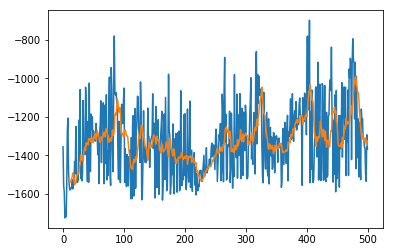

In [1]:
%matplotlib inline
import gym
from agents.ddpg_v4.ddpg_agent import DDPG as DDPGv4

pendulum_env = gym.make('Pendulum-v0')
pendulum_DDPGv4 = DDPGv4(pendulum_env)
pendulum_DDPGv4.test_every_n_episodes = 100
pendulum_DDPGv4.train(num_episodes=500)                 
pendulum_DDPGv4.plot_training_scores()   

Well, it's not very good. Very noisy performance. Maybe more training will help.

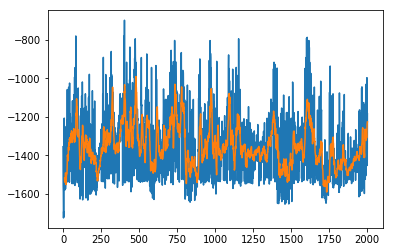

In [7]:
# pendulum_DDPGv4.train(num_episodes=1500)                 
pendulum_DDPGv4.plot_training_scores()   

In [3]:
pendulum_DDPGv4.run_episode(render=True)

(-1531.8119844707062, 200, 33.98594617843628)

Well, I think we're going to have to count that as a failure. After 2000 episodes, it's still very noisy, and not consistently achieving a better score than random. I'm pretty confused about this, since I think I've basically duplicated the DDPG network.

Let's have a look at how it does with the Hover Task.

Start with a random agent for baseline...

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode: 1000  Steps:    84  Score: -30608.01 (Best: -7079.09)  Time: 0.08s  Steps/Sec:  1113     
== Test Run == Episodes Trained = 1000, Average Score over 5 runs  = -16414.486


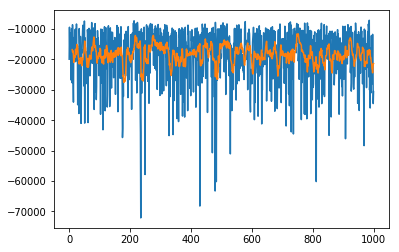

In [9]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper           # Wraps a Task in an Env
from tasks.hover_task import HoverTask           # The original "move to position" Task
from agents.agent import RandomAgent                 # Chooses random actions

hover_env = TaskWrapper(HoverTask()) 
hover_RA = RandomAgent(hover_env)
hover_RA.test_every_n_episodes = 1000
hover_RA.train(num_episodes=1000)
hover_RA.plot_training_scores()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:   12  Steps:    25  Score: -28503.83 (Best: -15941.77)  Time: 2.99s  Steps/Sec:     8     

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:  100  Steps:    25  Score: -19176.38 (Best: -9980.59)  Time: 3.70s  Steps/Sec:     6     
== Test Run == Episodes Trained =  100, Average Score over 5 runs  = -17640.484
Training Episode:  200  Steps:    24  Score: -9543.37 (Best: -9543.37)  Time: 3.07s  Steps/Sec:     7     
== Test Run == Episodes Trained =  200, Average Score over 5 runs  = -10486.811
Training Episode:  279  Steps:    24  Score: -9288.28 (Best: -9181.78)  Time: 3.66s  Steps/Sec:     6     

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Training Episode:  300  Steps:    25  Score: -9821.86 (Best: -9181.78)  Time: 3.03s  Steps/Sec:     8     
== Test Run == Episodes Trained =  300, Average Score over 5 runs  = -9814.959
Training Episode:  400  Steps:    25  Score: -10066.79 (Best: -9181.78)  Time: 3.03s  Steps/Sec:     8    
== Test Run == Episodes Trained =  400, Average Score over 5 runs  = -10080.603
Training Episode:  500  Steps:    26  Score: -12079.26 (Best: -9181.78)  Time: 5.59s  Steps/Sec:     4    
== Test Run == Episodes Trained =  500, Average Score over 5 runs  = -12236.128
Training Episode:  600  Steps:    25  Score: -11104.63 (Best: -9181.78)  Time: 3.25s  Steps/Sec:     7    
== Test Run == Episodes Trained =  600, Average Score over 5 runs  = -11595.863
Training Episode:  700  Steps:    25  Score: -26779.73 (Best: -9181.78)  Time: 4.04s  Steps/Sec:     6    
== Test Run == Episodes Trained =  700, Average Score over 5 runs  = -19455.056
Training Episode:  800  Steps:    27  Score: -20709.98 (Best: -918

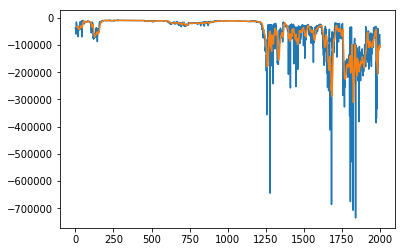

In [4]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper           # Wraps a Task in an Env
from tasks.hover_task import HoverTask           # The original "move to position" Task
from agents.ddpg_v4.ddpg_agent import DDPG as DDPGv4


hover_env = TaskWrapper(HoverTask()) 
hover_DDPGv4 = DDPGv4(hover_env)
hover_DDPGv4.test_every_n_episodes = 100
hover_DDPGv4.train(num_episodes=2000)
hover_DDPGv4.plot_training_scores()

It looks like my reward function is not working very well. The most successful runs (i.e., those that survived for the largest numbers of steps) had very bad rewards. I assume this is not helping the agent learn.

Since the reward function is being dominated by the velocity and spin components, so I'm going to reduce their weights and try again. 

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:   62  Steps:    22  Score:   551.27 (Best:  1618.87)  Time: 2.74s  Steps/Sec:     8     

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:  354  Steps:    23  Score:   631.87 (Best:  2177.11)  Time: 2.85s  Steps/Sec:     8     

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Training Episode:  400  Steps:    26  Score:   713.39 (Best:  2177.11)  Time: 4.00s  Steps/Sec:     6    
== Test Run == Episodes Trained =  400, Average Score over 5 runs  = 748.574
Training Episode:  800  Steps:    26  Score:   731.93 (Best:  2177.11)  Time: 3.20s  Steps/Sec:     8    
== Test Run == Episodes Trained =  800, Average Score over 5 runs  = 731.924
Training Episode: 1200  Steps:    30  Score:   846.96 (Best:  2177.11)  Time: 4.09s  Steps/Sec:     7    
== Test Run == Episodes Trained = 1200, Average Score over 5 runs  = 687.009
Training Episode: 1600  Steps:    26  Score:   668.83 (Best:  2177.11)  Time: 3.28s  Steps/Sec:     7    
== Test Run == Episodes Trained = 1600, Average Score over 5 runs  = 670.029
Training Episode: 2000  Steps:    57  Score:  1405.73 (Best:  2357.29)  Time: 7.05s  Steps/Sec:     8     
== Test Run == Episodes Trained = 2000, Average Score over 5 runs  = 1043.446


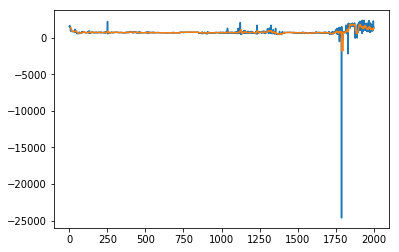

In [5]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper           # Wraps a Task in an Env
from tasks.hover_task import HoverTask           # The original "move to position" Task
from agents.ddpg_v4.ddpg_agent import DDPG as DDPGv4


hover_env2 = TaskWrapper(HoverTask(reward_weights = [10.,0.,-1e-2, -1e-3])) 
hover2_DDPGv4 = DDPGv4(hover_env2)
hover2_DDPGv4.test_every_n_episodes = 400
hover2_DDPGv4.train(num_episodes=2000)
hover2_DDPGv4.plot_training_scores()

This looks like it may have actually done something useful! Let's zoom in and ignore that outlier...

(0, 2000)

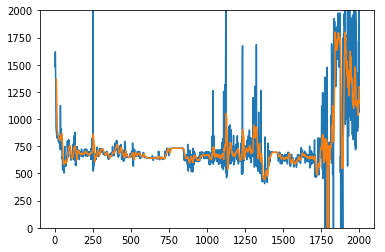

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
smoothing = 10
scores = hover2_DDPGv4.train_scores
num_episodes = hover2_DDPGv4.episodes_trained
plt.figure()
        # Plot steps
plt.plot(range(num_episodes),scores,label='scores')
plt.plot(range(smoothing,num_episodes),[np.mean(scores[i-smoothing:i]) for i in range(num_episodes) if i >= smoothing])
plt.ylim((0,2000))

It looks like it found its way out of some local minimum, and back to an unstable region. 

One more thing to try is removing the action repeats from the HoverTask, since on reflection, I don't think they actually do anything useful.

At this point, I'm wondering if this thing is trying to optimize the wrong value.  

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:   42  Steps:    94  Score:    86.21 (Best:   151.08)  Time: 12.21s  Steps/Sec:     7    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:   93  Steps:    63  Score:    49.68 (Best:   178.07)  Time: 10.25s  Steps/Sec:     6    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Training Episode:  100  Steps:    74  Score:    60.41 (Best:   178.07)  Time: 23.67s  Steps/Sec:     3    
== Test Run == Episodes Trained =  100, Average Score over 5 runs  =  58.111
Training Episode:  200  Steps:   251  Score:   200.14 (Best:   203.22)  Time: 30.54s  Steps/Sec:     8    
== Test Run == Episodes Trained =  200, Average Score over 5 runs  = 200.196
Training Episode:  300  Steps:    73  Score:    67.75 (Best:   203.22)  Time: 9.03s  Steps/Sec:     8     
== Test Run == Episodes Trained =  300, Average Score over 5 runs  =  73.381
Training Episode:  400  Steps:    66  Score:    60.38 (Best:   203.22)  Time: 8.15s  Steps/Sec:     8     
== Test Run == Episodes Trained =  400, Average Score over 5 runs  =  60.376
Training Episode:  500  Steps:    66  Score:    60.38 (Best:   203.22)  Time: 10.42s  Steps/Sec:     6    
== Test Run == Episodes Trained =  500, Average Score over 5 runs  =  60.376


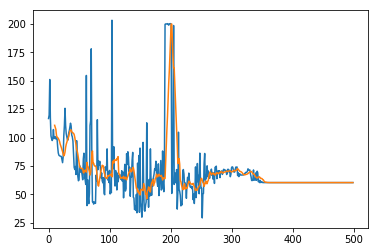

In [14]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper           # Wraps a Task in an Env
from tasks.hover_task import HoverTask           # The original "move to position" Task
from agents.ddpg_v4.ddpg_agent import DDPG as DDPGv4

ht_no_repeats = HoverTask(reward_weights = [1.,0.,-1e-3, -1e-4])
ht_no_repeats.action_repeat=1
ht_no_repeats.state_size = 12
hover_env3 = TaskWrapper(ht_no_repeats)
hover3_DDPGv4 = DDPGv4(hover_env3)
hover3_DDPGv4.test_every_n_episodes = 100
hover3_DDPGv4.train(num_episodes=500)
hover3_DDPGv4.plot_training_scores()

This is weird. It finds a good solution, but then moves away from it. One more try:
- Removed batch normalization on input layer of actor
- Switched to tanh on output of actor
- Added weight decay to critic as in DDPG

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D
/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:  100  Steps:    78  Score:    71.25 (Best:    73.05)  Time: 9.90s  Steps/Sec:     7     
== Test Run == Episodes Trained =  100, Average Score over 5 runs  =  70.278
Training Episode:  200  Steps:    73  Score:    67.34 (Best:    81.77)  Time: 9.14s  Steps/Sec:     7     
== Test Run == Episodes Trained =  200, Average Score over 5 runs  =  68.238
Training Episode:  300  Steps:    85  Score:    77.77 (Best:    84.67)  Time: 10.18s  Steps/Sec:     8    
== Test Run == Episodes Trained =  300, Average Score over 5 runs  =  77.773
Training Episode:  400  Steps:    72  Score:    66.05 (Best:    84.67)  Time: 13.10s  Steps/Sec:     5    
== Test Run == Episodes Trained =  400, Average Score over 5 runs  =  66.024
Training Episode:  500  Steps:    73  Score:    67.29 (Best:    84.67)  Time: 8.81s  Steps/Sec:     8     
== Test Run == Episodes Trained =  500, Average Score over 5 runs  =  66.501


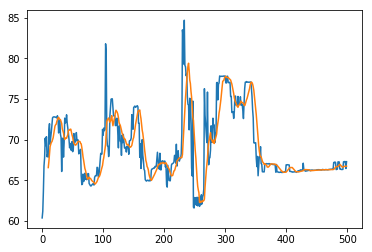

In [15]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper           # Wraps a Task in an Env
from tasks.hover_task import HoverTask           # The original "move to position" Task
from agents.ddpg_v5.ddpg_agent import DDPG as DDPGv5

ht_no_repeats = HoverTask(reward_weights = [1.,0.,-1e-3, -1e-4])
ht_no_repeats.action_repeat=1
ht_no_repeats.state_size = 12
hover_env3 = TaskWrapper(ht_no_repeats)
hover3_DDPGv5 = DDPGv5(hover_env3)
hover3_DDPGv5.test_every_n_episodes = 100
hover3_DDPGv5.train(num_episodes=500)
hover3_DDPGv5.plot_training_scores()

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D
/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:  600  Steps:    70  Score:    64.58 (Best:    84.67)  Time: 9.43s  Steps/Sec:     7     
== Test Run == Episodes Trained =  600, Average Score over 5 runs  =  64.613
Training Episode:  700  Steps:    95  Score:    89.95 (Best:    90.81)  Time: 11.39s  Steps/Sec:     8    
== Test Run == Episodes Trained =  700, Average Score over 5 runs  =  89.898
Training Episode:  800  Steps:    80  Score:    73.22 (Best:    93.05)  Time: 9.68s  Steps/Sec:     8     
== Test Run == Episodes Trained =  800, Average Score over 5 runs  =  73.327
Training Episode:  900  Steps:    72  Score:    64.32 (Best:    93.05)  Time: 9.78s  Steps/Sec:     7     
== Test Run == Episodes Trained =  900, Average Score over 5 runs  =  64.268
Training Episode: 1000  Steps:    80  Score:    73.34 (Best:    93.05)  Time: 9.58s  Steps/Sec:     8     
== Test Run == Episodes Trained = 1000, Average Score over 5 runs  =  73.475


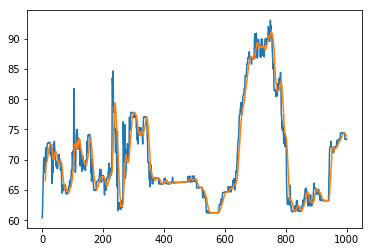

In [16]:
hover3_DDPGv5.train(num_episodes=500)
hover3_DDPGv5.plot_training_scores()

Still not good. Okay, I need some help!

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:    5  Steps:    45  Score:  8662.35 (Best: 10298.27)  Time: 0.77s  Steps/Sec:    58    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:   73  Steps:    84  Score: 17310.49 (Best: 18657.68)  Time: 1.39s  Steps/Sec:    60    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Training Episode:  100  Steps:    84  Score: 17319.78 (Best: 18657.68)  Time: 1.43s  Steps/Sec:    58    
== Test Run == Episodes Trained =  100, Average Score over 5 runs  = 17270.069


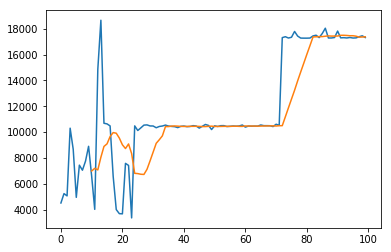

In [7]:
%matplotlib inline
from helper import write_episode, plot_episode
from tasks.task_wrapper import TaskWrapper      # Wraps a Task in an Env
from tasks.hover_task2 import HoverTask           # The original "move to position" Task
from agents.ddpg_v6.ddpg_agent import DDPG as DDPGv6

ht = HoverTask()
hte = TaskWrapper(ht)
ht2_DDPGv6 = DDPGv6(hte)
ht2_DDPGv6.test_every_n_episodes = 100
ht2_DDPGv6.train(num_episodes=100)
ht2_DDPGv6.plot_training_scores()


This works adequately well. I tested over a series of runs and on most, it figures out how to stay alive for the full amount of time within ~100 episodes, but sometimes it gets stuck and fails to get there.

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:    4  Steps:    42  Score: 10304.49 (Best: 10304.49)  Time: 0.94s  Steps/Sec:    44    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:    9  Steps:    31  Score:  6987.58 (Best: 13804.48)  Time: 0.84s  Steps/Sec:    37    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Training Episode:  100  Steps:    30  Score:  5649.30 (Best: 23992.06)  Time: 0.46s  Steps/Sec:    65    
== Test Run == Episodes Trained =  100, Average Score over 5 runs  = 7378.939


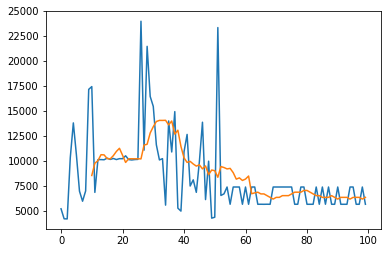

In [3]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper      # Wraps a Task in an Env
from tasks.hover_task3 import HoverTask           # The original "move to position" Task
from agents.ddpg_v6.ddpg_agent import DDPG as DDPGv6

ht3 = HoverTask()
hte3 = TaskWrapper(ht3)
ht3_DDPGv6 = DDPGv6(hte3)
ht3_DDPGv6.test_every_n_episodes = 100
ht3_DDPGv6.train(num_episodes=100)
ht3_DDPGv6.plot_training_scores()


In [4]:
ht3_DDPGv6.train(num_episodes=100)

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:  103  Steps:    30  Score:  5646.48 (Best: 23992.06)  Time: 0.50s  Steps/Sec:    60    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Training Episode:  200  Steps:    30  Score:  5646.52 (Best: 23992.06)  Time: 0.47s  Steps/Sec:    64    
== Test Run == Episodes Trained =  200, Average Score over 5 runs  = 7378.939


/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D
/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


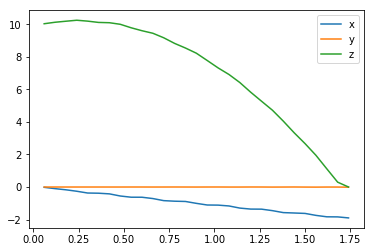

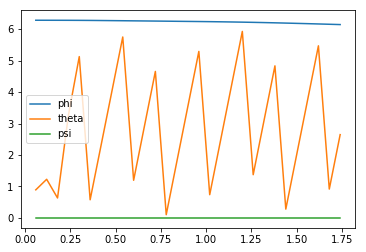

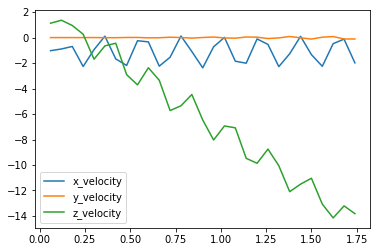

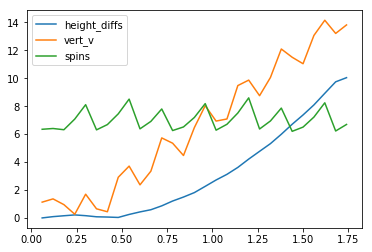

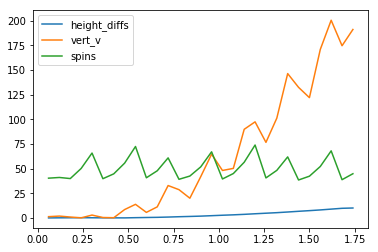

In [5]:
results = write_episode(ht3_DDPGv6, 'test.csv')
plot_episode(results)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:    2  Steps:    27  Score:    60.02 (Best:    60.02)  Time: 0.04s  Steps/Sec:   620    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:   17  Steps:    26  Score:    58.56 (Best:    62.91)  Time: 0.42s  Steps/Sec:    62    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Training Episode:  100  Steps:    29  Score:    62.56 (Best:   155.33)  Time: 0.45s  Steps/Sec:    64    
== Test Run == Episodes Trained =  100, Average Score over 5 runs  =  62.555
Training Episode:  200  Steps:    29  Score:    62.56 (Best:   155.33)  Time: 1.35s  Steps/Sec:    21    
== Test Run == Episodes Trained =  200, Average Score over 5 runs  =  62.555


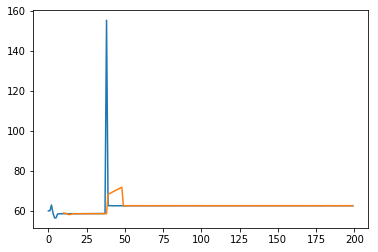

In [4]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper      # Wraps a Task in an Env
from tasks.hover_task4 import HoverTask           # The original "move to position" Task
from agents.ddpg_v6.ddpg_agent import DDPG as DDPGv6

ht4 = HoverTask(runtime=20.)
hte4 = TaskWrapper(ht4)
ht4_DDPGv6 = DDPGv6(hte4)
ht4_DDPGv6.test_every_n_episodes = 100
ht4_DDPGv6.train(num_episodes=200)
ht4_DDPGv6.plot_training_scores()


In [6]:
ht4_DDPGv6.train(num_episodes=100)

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:  201  Steps:    29  Score:    62.57 (Best:   155.33)  Time: 0.55s  Steps/Sec:    52    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Training Episode:  300  Steps:    29  Score:    62.56 (Best:   155.33)  Time: 0.47s  Steps/Sec:    62    
== Test Run == Episodes Trained =  300, Average Score over 5 runs  =  62.555


/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D
/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


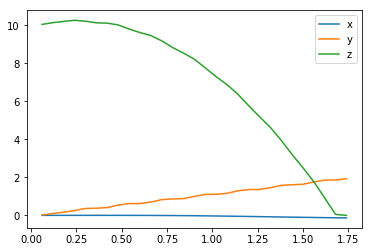

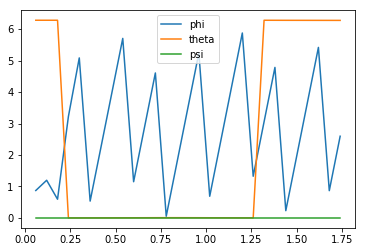

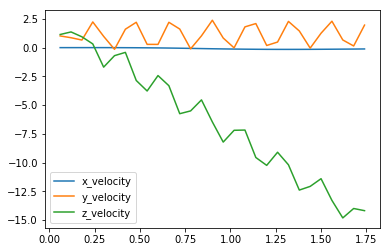

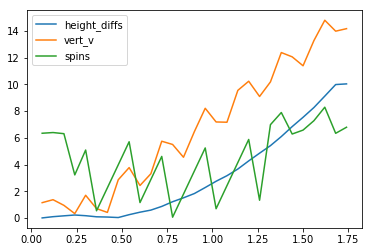

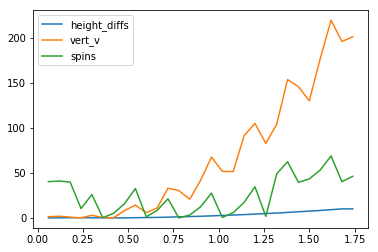

In [5]:
from helper import record_quadcopter_episode, plot_quadcopter_episode
results = record_quadcopter_episode(ht4_DDPGv6, 'ht4_DDPGv6.csv')
plot_quadcopter_episode(results)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:    5  Steps:    16  Score:    64.28 (Best:   115.00)  Time: 0.25s  Steps/Sec:    64    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:   29  Steps:    26  Score:   105.66 (Best:   388.29)  Time: 0.40s  Steps/Sec:    64    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Training Episode:  100  Steps:   117  Score:   559.98 (Best:  1773.03)  Time: 1.81s  Steps/Sec:    64    
== Test Run == Episodes Trained =  100, Average Score over 5 runs  = 1765.457
Training Episode:  200  Steps:   334  Score:  1765.89 (Best:  1775.47)  Time: 5.24s  Steps/Sec:    63    
== Test Run == Episodes Trained =  200, Average Score over 5 runs  = 1765.472


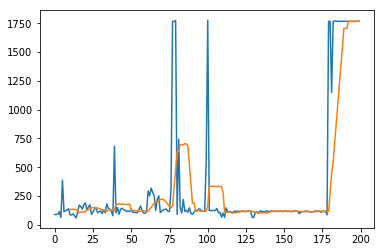

In [8]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper      # Wraps a Task in an Env
from tasks.hover_task5 import HoverTask           # The original "move to position" Task
from agents.ddpg_v6.ddpg_agent import DDPG as DDPGv6

ht5 = HoverTask(runtime=20.)
hte5 = TaskWrapper(ht5)
ht5_DDPGv6 = DDPGv6(hte5)
ht5_DDPGv6.test_every_n_episodes = 100
ht5_DDPGv6.train(num_episodes=200)
ht5_DDPGv6.plot_training_scores()


/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D
/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


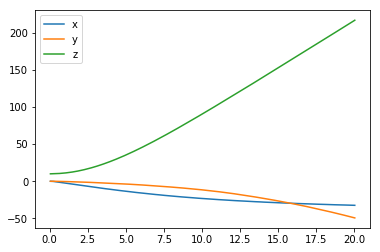

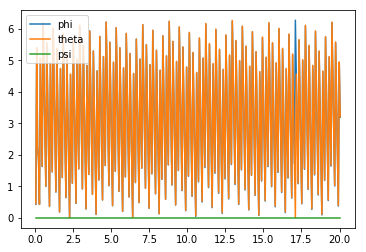

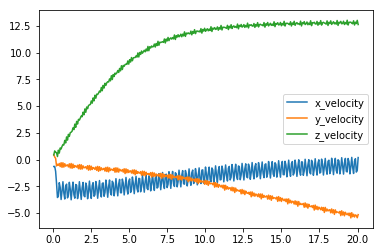

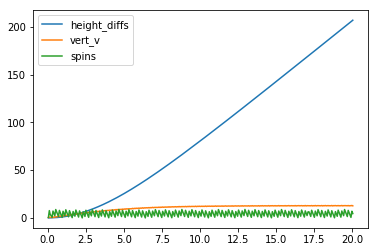

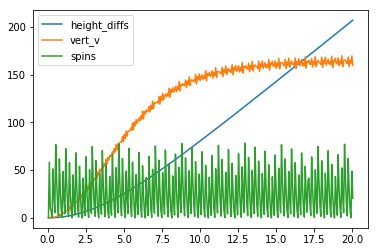

In [9]:
from helper import record_quadcopter_episode, plot_quadcopter_episode
results = record_quadcopter_episode(ht5_DDPGv6, 'ht5_DDPGv6.csv')
plot_quadcopter_episode(results)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:    5  Steps:    23  Score:   106.26 (Best:   117.91)  Time: 0.40s  Steps/Sec:    57    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:   17  Steps:    26  Score:   116.95 (Best:   122.77)  Time: 0.49s  Steps/Sec:    52    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Training Episode:  100  Steps:    26  Score:   116.99 (Best:   122.77)  Time: 0.45s  Steps/Sec:    57    
== Test Run == Episodes Trained =  100, Average Score over 5 runs  = 117.094
Training Episode:  200  Steps:    30  Score:   128.75 (Best:   418.70)  Time: 0.63s  Steps/Sec:    47    
== Test Run == Episodes Trained =  200, Average Score over 5 runs  = 124.171


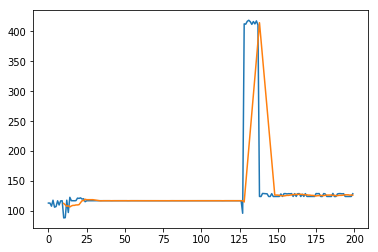

In [10]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper      # Wraps a Task in an Env
from tasks.hover_task6 import HoverTask           # The original "move to position" Task
from agents.ddpg_v6.ddpg_agent import DDPG as DDPGv6

ht6 = HoverTask()
hte6 = TaskWrapper(ht6)
ht6_DDPGv6 = DDPGv6(hte6)
ht6_DDPGv6.test_every_n_episodes = 100
ht6_DDPGv6.train(num_episodes=200)
ht6_DDPGv6.plot_training_scores()


/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


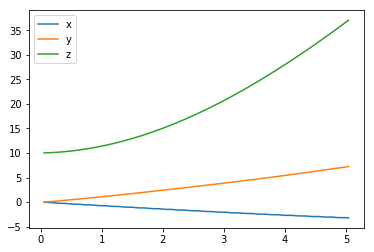

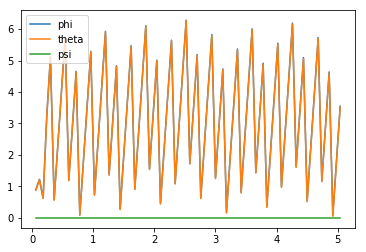

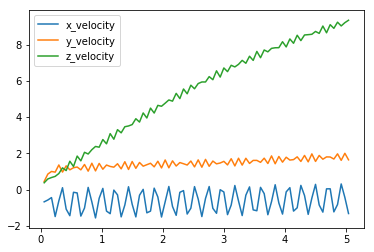

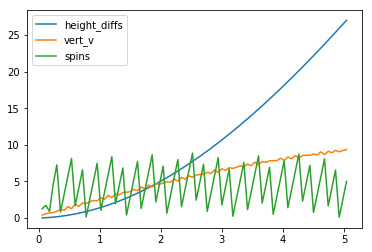

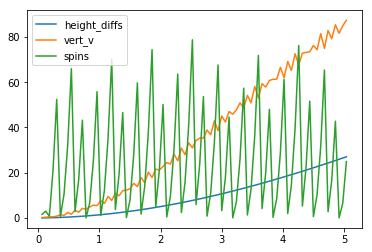

In [4]:
from helper import write_episode, plot_episode
results = write_episode(ht6_DDPGv6, 'test.csv')
plot_episode(results)

In [6]:
from physics_sim import PhysicsSim
ht6_DDPGv6.env.task.sim = PhysicsSim(ht6_DDPGv6.env.task.init_pose, ht6_DDPGv6.env.task.init_velocities, ht6_DDPGv6.env.task.init_angle_velocities, 10.)

In [7]:
ht6_DDPGv6.train(num_episodes=200)

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D
/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:  400  Steps:   167  Score:   887.79 (Best:   892.78)  Time: 2.43s  Steps/Sec:    68    
== Test Run == Episodes Trained =  400, Average Score over 5 runs  = 888.013
Training Episode:  500  Steps:   167  Score:   888.08 (Best:   892.78)  Time: 2.57s  Steps/Sec:    64    
== Test Run == Episodes Trained =  500, Average Score over 5 runs  = 888.013


/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D
/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


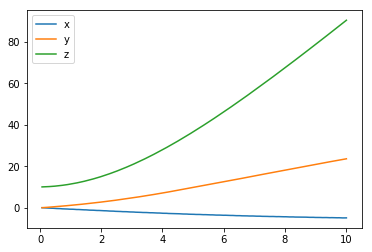

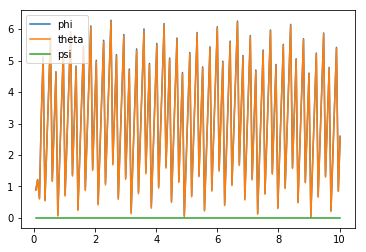

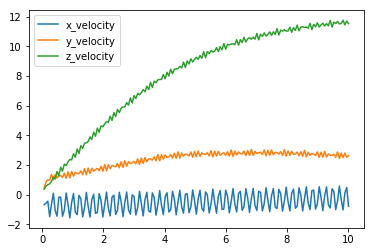

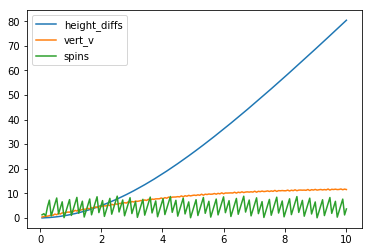

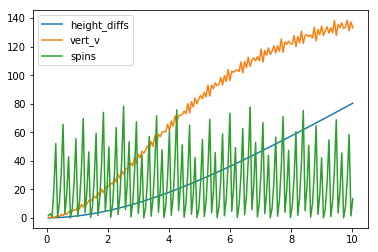

In [8]:
from helper import write_episode, plot_episode
results = write_episode(ht6_DDPGv6, 'test.csv')
plot_episode(results)

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:    2  Steps:    29  Score:    99.92 (Best:   103.19)  Time: 0.03s  Steps/Sec:   841    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:    8  Steps:    26  Score:    94.38 (Best:   111.61)  Time: 0.49s  Steps/Sec:    53    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Training Episode:  100  Steps:    68  Score:   210.19 (Best:   360.02)  Time: 0.94s  Steps/Sec:    72    
== Test Run == Episodes Trained =  100, Average Score over 5 runs  = 327.286
Training Episode:  200  Steps:   101  Score:   312.37 (Best:   366.05)  Time: 1.41s  Steps/Sec:    71    
== Test Run == Episodes Trained =  200, Average Score over 5 runs  = 327.286


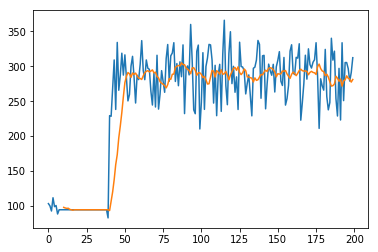

In [2]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper      # Wraps a Task in an Env
from tasks.hover_task7 import HoverTask           # The original "move to position" Task
from agents.ddpg_v6.ddpg_agent import DDPG as DDPGv6

ht7 = HoverTask(runtime=20.)
hte7 = TaskWrapper(ht7)
ht7_DDPGv6 = DDPGv6(hte7)
ht7_DDPGv6.test_every_n_episodes = 100
ht7_DDPGv6.train(num_episodes=200)
ht7_DDPGv6.plot_training_scores()


In [3]:
ht7_DDPGv6.train(num_episodes=200)

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D
/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:  300  Steps:    95  Score:   293.06 (Best:   366.05)  Time: 2.03s  Steps/Sec:    46    
== Test Run == Episodes Trained =  300, Average Score over 5 runs  = 327.286
Training Episode:  400  Steps:   101  Score:   311.55 (Best:   366.05)  Time: 1.43s  Steps/Sec:    70    
== Test Run == Episodes Trained =  400, Average Score over 5 runs  = 327.286


In [1]:
from helper import record_quadcopter_episode, plot_quadcopter_episode
results = record_quadcopter_episode(ht7_DDPGv6, None)
plot_quadcopter_episode(results)

NameError: name 'ht7_DDPGv6' is not defined

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:    4  Steps:    29  Score:   121.29 (Best:   121.29)  Time: 0.58s  Steps/Sec:    50    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:    8  Steps:   146  Score:   589.07 (Best:   589.07)  Time: 2.56s  Steps/Sec:    57    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Training Episode:  100  Steps:    30  Score:   118.65 (Best:   891.99)  Time: 0.64s  Steps/Sec:    46    
== Test Run == Episodes Trained =  100, Average Score over 5 runs  = 118.126
Training Episode:  200  Steps:   134  Score:   640.63 (Best:   935.85)  Time: 1.91s  Steps/Sec:    70    
== Test Run == Episodes Trained =  200, Average Score over 5 runs  = 681.359
Training Episode:  300  Steps:    41  Score:   187.06 (Best:   935.85)  Time: 0.74s  Steps/Sec:    55    
== Test Run == Episodes Trained =  300, Average Score over 5 runs  = 180.569
Training Episode:  400  Steps:    40  Score:   182.13 (Best:   935.85)  Time: 0.57s  Steps/Sec:    70    
== Test Run == Episodes Trained =  400, Average Score over 5 runs  = 180.569
Training Episode:  500  Steps:   105  Score:   419.61 (Best:   935.85)  Time: 1.58s  Steps/Sec:    66    
== Test Run == Episodes Trained =  500, Average Score over 5 runs  = 451.970


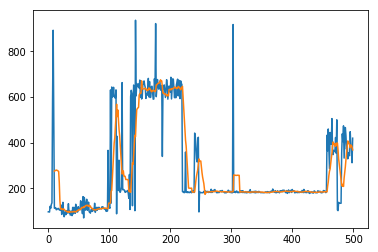

In [2]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper      # Wraps a Task in an Env
from tasks.hover_task8 import HoverTask           # The original "move to position" Task
from agents.ddpg_v6.ddpg_agent import DDPG as DDPGv6

ht8 = HoverTask(runtime=20.)
hte8 = TaskWrapper(ht8)
ht8_DDPGv6 = DDPGv6(hte8)
ht8_DDPGv6.test_every_n_episodes = 100
ht8_DDPGv6.train(num_episodes=500)
ht8_DDPGv6.plot_training_scores()


In [3]:
ht8_DDPGv6.train(num_episodes=200)

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:  501  Steps:   101  Score:   407.90 (Best:   935.85)  Time: 1.75s  Steps/Sec:    57    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Training Episode:  600  Steps:   334  Score:   857.71 (Best:   955.76)  Time: 5.66s  Steps/Sec:    59     
== Test Run == Episodes Trained =  600, Average Score over 5 runs  = 946.026
Training Episode:  700  Steps:   334  Score:   936.14 (Best:   960.54)  Time: 5.67s  Steps/Sec:    58    
== Test Run == Episodes Trained =  700, Average Score over 5 runs  = 946.026


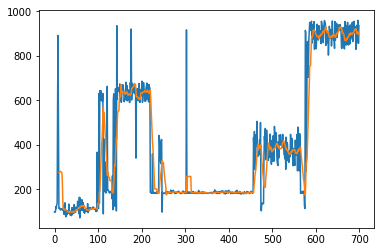

In [5]:
ht8_DDPGv6.plot_training_scores()

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D
/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


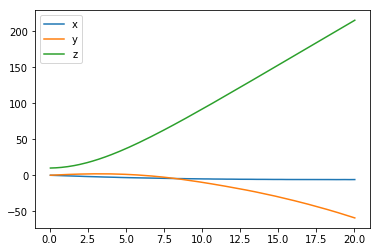

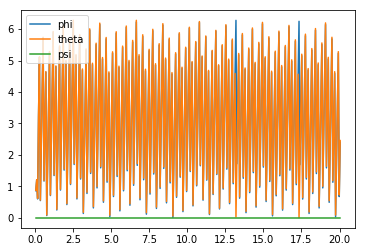

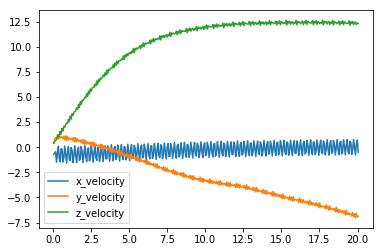

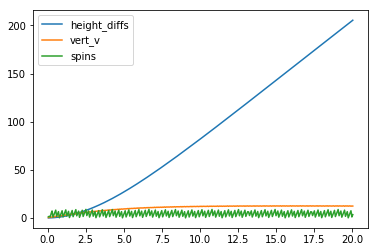

In [4]:
from helper import record_quadcopter_episode, plot_quadcopter_episode
results = record_quadcopter_episode(ht8_DDPGv6, None)
plot_quadcopter_episode(results)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:    3  Steps:    24  Score:   108.71 (Best:   108.71)  Time: 1.71s  Steps/Sec:    14    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:    7  Steps:    25  Score:   131.97 (Best:   265.72)  Time: 0.42s  Steps/Sec:    59    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Training Episode:  100  Steps:    41  Score:   160.39 (Best:   523.42)  Time: 0.76s  Steps/Sec:    54    
== Test Run == Episodes Trained =  100, Average Score over 5 runs  = 564.657
Training Episode:  200  Steps:   159  Score:   441.62 (Best:   663.49)  Time: 2.27s  Steps/Sec:    69     
== Test Run == Episodes Trained =  200, Average Score over 5 runs  = 564.974
Training Episode:  300  Steps:   119  Score:   357.37 (Best:   663.49)  Time: 3.20s  Steps/Sec:    37    
== Test Run == Episodes Trained =  300, Average Score over 5 runs  = 564.974
Training Episode:  400  Steps:   185  Score:   521.16 (Best:   663.49)  Time: 2.71s  Steps/Sec:    68    
== Test Run == Episodes Trained =  400, Average Score over 5 runs  = 564.974


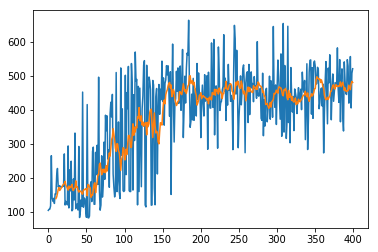

In [6]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper      # Wraps a Task in an Env
from tasks.hover_task9 import HoverTask           # The original "move to position" Task
from agents.ddpg_v6.ddpg_agent import DDPG as DDPGv6

ht9 = HoverTask(runtime=20.)
hte9 = TaskWrapper(ht9)
ht9_DDPGv6 = DDPGv6(hte9)
ht9_DDPGv6.test_every_n_episodes = 100
ht9_DDPGv6.train(num_episodes=400)
ht9_DDPGv6.plot_training_scores()

In [12]:
ht9_DDPGv6.train(num_episodes=200)

Training Episode: 1200  Steps:   145  Score:   394.53 (Best:   811.83)  Time: 2.32s  Steps/Sec:    62     
== Test Run == Episodes Trained = 1200, Average Score over 5 runs  = 564.974
Training Episode: 1300  Steps:   122  Score:   356.60 (Best:   811.83)  Time: 1.75s  Steps/Sec:    69    
== Test Run == Episodes Trained = 1300, Average Score over 5 runs  = 564.974


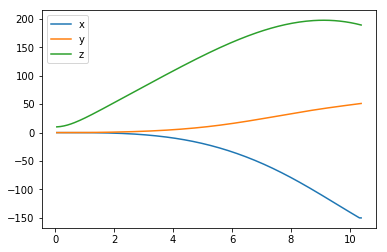

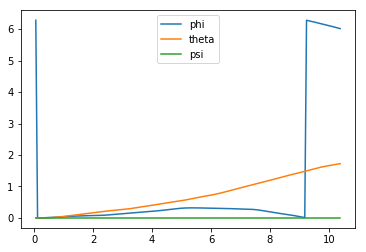

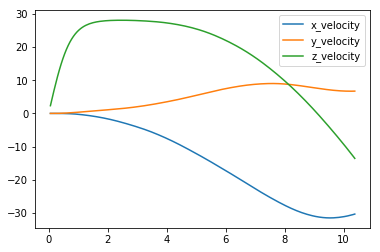

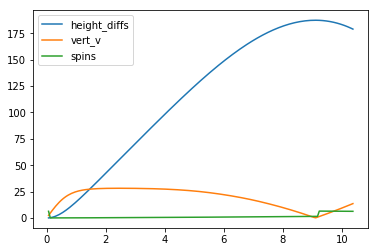

In [13]:
from helper import record_quadcopter_episode, plot_quadcopter_episode
results = record_quadcopter_episode(ht9_DDPGv6, None)
plot_quadcopter_episode(results)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:    4  Steps:    25  Score:   128.74 (Best:   132.05)  Time: 0.45s  Steps/Sec:    55    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:    6  Steps:    24  Score:   122.66 (Best:   132.05)  Time: 0.51s  Steps/Sec:    46    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Training Episode:  100  Steps:    34  Score:   170.72 (Best:   703.53)  Time: 0.60s  Steps/Sec:    56    
== Test Run == Episodes Trained =  100, Average Score over 5 runs  = 928.584
Training Episode:  200  Steps:   208  Score:   610.64 (Best:   938.58)  Time: 7.34s  Steps/Sec:    28     
== Test Run == Episodes Trained =  200, Average Score over 5 runs  = 928.663
Training Episode:  300  Steps:   187  Score:   543.29 (Best:   938.58)  Time: 3.47s  Steps/Sec:    53    
== Test Run == Episodes Trained =  300, Average Score over 5 runs  = 928.663
Training Episode:  400  Steps:   166  Score:   479.01 (Best:   942.51)  Time: 3.65s  Steps/Sec:    45     
== Test Run == Episodes Trained =  400, Average Score over 5 runs  = 928.663


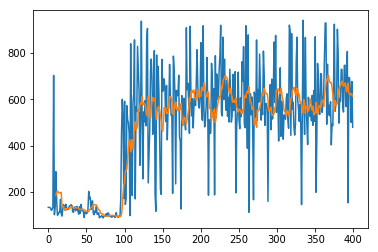

In [19]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper      # Wraps a Task in an Env
from tasks.hover_task9 import HoverTask           # The original "move to position" Task
from agents.ddpg_v6.ddpg_agent import DDPG as DDPGv6

ht9 = HoverTask(runtime=20.)
hte9 = TaskWrapper(ht9)
ht9_DDPGv6b = DDPGv6(hte9)
ht9_DDPGv6b.test_every_n_episodes = 100
ht9_DDPGv6b.train(num_episodes=400)
ht9_DDPGv6b.plot_training_scores()

This reward function works pretty well, allowing the basic agent to learn successfully. 
The agent is not learning to hover, but it is successfully increasing the reward it can obtain, and is managing to stay alive for the extended runtime of 20 seconds.

Learning is not very stable, and sometimes the agent fails to learn at all.

Let's try improving the agent now.

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:    5  Steps:    27  Score:   134.40 (Best:   134.40)  Time: 1.02s  Steps/Sec:    26    

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode:  100  Steps:    30  Score:   166.44 (Best:   218.46)  Time: 1.35s  Steps/Sec:    22    
== Test Run == Episodes Trained =  100, Average Score over 5 runs  = 153.011
Training Episode:  200  Steps:    25  Score:   128.61 (Best:   232.84)  Time: 1.03s  Steps/Sec:    24    
== Test Run == Episodes Trained =  200, Average Score over 5 runs  = 132.789
Training Episode:  300  Steps:    28  Score:   162.47 (Best:   232.84)  Time: 2.13s  Steps/Sec:    13    
== Test Run == Episodes Trained =  300, Average Score over 5 runs  = 177.618
Training Episode:  400  Steps:    31  Score:   188.94 (Best:   232.84)  Time: 1.89s  Steps/Sec:    16    
== Test Run == Episodes Trained =  400, Average Score over 5 runs  = 194.388


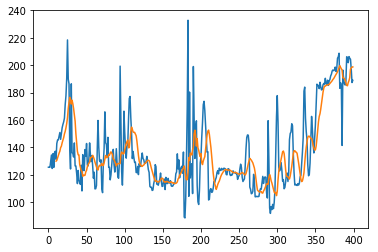

In [2]:
%matplotlib inline
from tasks.task_wrapper import TaskWrapper      # Wraps a Task in an Env
from tasks.hover_task9 import HoverTask           # The original "move to position" Task
from agents.ddpg_v2.ddpg_agent import DDPG as DDPGv2

ht9 = HoverTask(runtime=20.)
hte9 = TaskWrapper(ht9)
ht9_DDPGv2 = DDPGv2(hte9)
ht9_DDPGv2.test_every_n_episodes = 100
ht9_DDPGv2.train(num_episodes=400)
ht9_DDPGv2.plot_training_scores()

In [5]:
ht9_DDPGv2.train(num_episodes=400)

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Training Episode: 1300  Steps:    34  Score:   205.60 (Best:   448.68)  Time: 1.36s  Steps/Sec:    25    
== Test Run == Episodes Trained = 1300, Average Score over 5 runs  = 195.448
Training Episode: 1400  Steps:    26  Score:   124.74 (Best:   448.68)  Time: 1.09s  Steps/Sec:    23    
== Test Run == Episodes Trained = 1400, Average Score over 5 runs  = 117.151
Training Episode: 1500  Steps:    22  Score:   100.43 (Best:   448.68)  Time: 1.00s  Steps/Sec:    22    
== Test Run == Episodes Trained = 1500, Average Score over 5 runs  =  93.884
Training Episode: 1600  Steps:    28  Score:   122.26 (Best:   448.68)  Time: 1.14s  Steps/Sec:    24    
== Test Run == Episodes Trained = 1600, Average Score over 5 runs  =  91.343


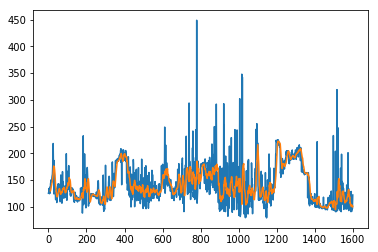

In [6]:
ht9_DDPGv2.plot_training_scores()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Training Episode:  100  Steps:   200  Score: -1619.07 (Best: -1048.95)  Time: 3.29s  Steps/Sec:    60    
== Test Run == Episodes Trained =  100, Average Score over 5 runs  = -1445.598
Training Episode:  200  Steps:   200  Score: -1624.14 (Best:  -947.92)  Time: 3.07s  Steps/Sec:    65    
== Test Run == Episodes Trained =  200, Average Score over 5 runs  = -1448.075
Training Episode:  300  Steps:   200  Score: -1462.21 (Best:  -947.92)  Time: 3.33s  Steps/Sec:    60    
== Test Run == Episodes Trained =  300, Average Score over 5 runs  = -1386.325
Training Episode:  400  Steps:   200  Score: -1383.09 (Best:  -944.96)  Time: 2.97s  Steps/Sec:    67     
== Test Run == Episodes Trained =  400, Average Score over 5 runs  = -1425.730
Training Episode:  500  Steps:   200  Score: -1431.53 (Best: 

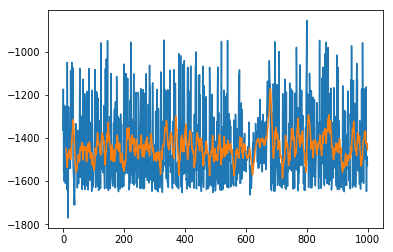

In [7]:
%matplotlib inline
# from tasks.task_wrapper import TaskWrapper      # Wraps a Task in an Env
# from tasks.hover_task2 import HoverTask           # The original "move to position" Task
import gym
from agents.ddpg_v6.ddpg_agent import DDPG as DDPGv6

pendulum_env = gym.make('Pendulum-v0')
pen_DDPGv6 = DDPGv6(pendulum_env)
pen_DDPGv6.test_every_n_episodes = 100
pen_DDPGv6.train(num_episodes=1000)
pen_DDPGv6.plot_training_scores()

Still not very good at pendulum though.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

## Initial Thinking
$\newcommand{\norm}[1]{\left\lVert#1\right\rVert}$

I want to teach the quadcopter to hover in place, because this seems like a useful primitive for achieving other goals such as landing and navigation. I'm also imagining hover/hold position as a sort of failsafe for when no commands are received. The goal behavior is to minimize velocity and angular velocity, and attain a specified altitude. Notably, it does NOT specify the position, as the goal is to stop moving. 

Other things I may add later include:
- Penalizing positional deviation (to prevent drift)
- Directly rewarding deceleration which may help damp oscillation
- I may want to set a minimum height and penalize the agent if it goes below that

Since we are using velocity, we need to have an action replay to allow us to compute velocity, and we may want a 2nd derivative for acceleration, so we'll use an action replay size of 3.

Naively, the reward function should have terms for:
1. positive reward for each time step we are still playing (to hover, you have to fly...)
2. penalty for positional deviation (minimize $\norm{init\_pose[2] - target_height}^2$)
3. penalty for movement (minimize $\norm{velocity}^2$)
4. penalty for spinning (minimize $\norm{angular\_velocity}^2$)
I'm ignoring the angle terms of the pose for now, because I don't really care about them, as long as it's stable.

For v1, we'll keep it simple as a linear combination of the above:
$$ R(\mathbf{w},t) = w_{1}t + w_{2}\norm{init\_pose[0:3] - pos}^2 + w_{3}\norm{velocity}^2 + w_{4}\norm{angular\_velocity}^2 $$
For initial weights, the inuition is that:
- we want to get the most reward by not crashing ($w_1 = 10$)
- we don't care about positional deviation for now ($w_2 = 0$)
- penalty for velocity ($w3 = -2$; might need to tune this)
- spinning is less bad ($w4 = -1$; might need to tune this too) 

So, initially, we can use:
$$\mathbf{w} = [w_1=10, w_2=0, w_3=-2, w_4=-1]$$
This will be a hyperparameter that we can tune.

### Updates
After experimenting, it was clear that the velocity and spin terms were dominating the score, which was causing the agent to get higher rewards for episodes that crashed sooner. So, I updated the weights to get the agent to prioritize staying alive.

New weight vector is:
$$\mathbf{w} = [w_1=10, w_2=0, w_3=-1e-3, w_4=-1e-4]$$

I also noted that since velocity and angular velocity are directly accessible in the sim state, there's no need for action repeats, and removed those. That also reduces the state size substantially which helps slim down the model a bit.

### ... Much later

$\newcommand{\sigmoid}[1]{\sigma\left(#1\right)}$
I tested several versions of the reward function, finally landing on:
$$reward = 8 - 4\sigmoid{height\_diff} - 2\sigmoid{vertical\_accel} - \sigmoid{\norm{rotor\_speeds}/400} - 0.5\sigmoid{spin/100} - 0.5\sigmoid{\norm{pos\_diff}/10}$$
where $\sigmoid{x} = \frac{1}{1+\exp(-x)}$

Using this reward function allowed the default agent to successfully learn, albeit not with total stability. I think it may make sense to add a term for the horizontal acceleration too, to act as a damper (similar to PID control). I added the rotor-speed term to encourage more realistic speed changes, since these are real physical systems.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I chose to use DDPG, as this is a continuous space optimization, and DDPG has been shown to perform well on these tasks.

Using the boilerplate DDPG agent provided and the task specification above, the agent did manage to learn, though not reliably.

I tried a bunch of variants (DDPGv2 through DDPGv5) based on the DDPG paper architecture in an attempt to get better performance, but so far can't do better than the boilerplate agent. 

I am now trying to re-implement the DDPG algorithm from scratch based on some other code I found at https://github.com/hamzamerzic/ddpg.git to see if I can improve the performance!


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The task of hovering appears to be quite complex to learn, as it has a lot of moving pieces. Training seems to move in large jumps. First, the agent needs to figure out how to stay alive for long enough to do anything. Once it figures that out, it gets a lot more opportunity to learn the impacts of changing behavior. I saw lots of iterations where the agent was doing very badly and then suddenly moved into a new equilibrium where it would stay alive much longer.

I eventually ended up using a task based on sigmoid responses, as these gave the agent consistent reward for staying alive, and a smooth gradient that the agent could learn. I think it can be further refined by normalizing the weights, which might make it easier to learn.

In the best case, the agent learned to consistently stay alive for >20 seconds, and how to control spin and velocity.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

This is hard! I was surprised by how complex it was to specify a reward function that works.
Due to compounding errors, it's very easy for the agent to take off in one direction or another.

# Resources
- https://towardsdatascience.com/introduction-to-various-reinforcement-learning-algorithms-i-q-learning-sarsa-dqn-ddpg-72a5e0cb6287
- https://ctmakro.github.io/site/on_learning/rl/ddpg.html
- https://stackoverflow.com/questions/51496159/ddpg-deep-deterministic-policy-gradients-how-is-the-actor-updated
- https://github.com/robosamir/ddpg-ros-keras/blob/master/ActorNetwork.py
- https://github.com/hamzamerzic/ddpg
- https://github.com/keras-rl/keras-rl/blob/master/rl/agents/ddpg.py

In [3]:
import keras.backend as K
from keras.initializers import RandomUniform, VarianceScaling
from keras.layers import Input, Dense, concatenate, Lambda
from keras.models import Model
from keras import optimizers

def create_actor(n_states, n_actions):
    state_input = Input(shape=(n_states,))

    w_init = VarianceScaling(scale=1./3, mode='fan_in', distribution='uniform')
    h1 = Dense(400, kernel_initializer=w_init,
               bias_initializer=w_init, activation='relu')(state_input)
    h2 = Dense(300, kernel_initializer=w_init,
               bias_initializer=w_init, activation='relu')(h1)

    w_init = RandomUniform(-3e-3, 3e-3)
    out = Dense(n_actions, kernel_initializer=w_init,
                bias_initializer=w_init, activation='tanh')(h2)
    out = Lambda(lambda x: 2 * x, output_shape=(1,))(out)  # Since the output range is -2 to 2.

    return Model(inputs=[state_input], outputs=[out])


def create_critic(n_states, n_actions):
    state_input = Input(shape=(n_states,))
    action_input = Input(shape=(n_actions,))

    w_init = VarianceScaling(scale=1./3, mode='fan_in', distribution='uniform')
    h1 = Dense(400, kernel_initializer=w_init,
               bias_initializer=w_init, activation='relu')(state_input)
    x = concatenate([h1, action_input])
    h2 = Dense(300, kernel_initializer=w_init, bias_initializer=w_init, activation='relu')(x)

    w_init = RandomUniform(-3e-3, 3e-3)
    out = Dense(1, kernel_initializer=w_init, bias_initializer=w_init, activation='linear')(h2)

    return Model(inputs=[state_input, action_input], outputs=out)



In [5]:
from agents.ddpg.ddpg_agent import DDPGAgent
import gym
    
env = gym.make('Pendulum-v0')
n_actions = env.action_space.shape[0]
n_states = env.observation_space.shape[0]
n_episodes = 3
n_steps = 200
render_period = None
actor, tgt_actor = create_actor(n_states, n_actions), create_actor(n_states, n_actions)
critic, tgt_critic = create_critic(n_states, n_actions), create_critic(n_states, n_actions)

action_limits = [env.action_space.low, env.action_space.high]

agent = DDPGAgent(actor, tgt_actor, critic, tgt_critic, action_limits,
                             critic_decay=0)

agent.train(env, n_episodes, n_steps=n_steps)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Ep     3, steps  200, reward -1509.98120, mean -1507.77140, best -1307.39722, time 28.6s steps/sec     6 .
Trained 2 episodes. Elapsed time: 66.02621437807102. Avg Time per episode: 33.01310718903551


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Ep    47, steps   25, reward 280.44355, mean 270.28689, best 280.44355, time 1.7s steps/sec   15.

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Ep   197, steps   25, reward 285.61285, mean 276.73377, best 345.78431, time 0.7s steps/sec   37.

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D


Ep  1000, steps   29, reward 345.49216, mean 345.44012, best 585.92074, time 0.6s steps/sec   45.
Trained 1000 episodes. Elapsed time: 672.47s. Avg Time per episode: 0.67s


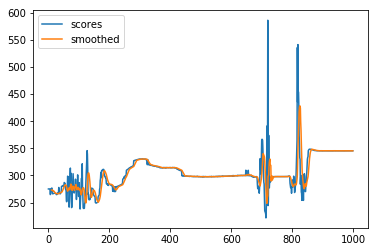

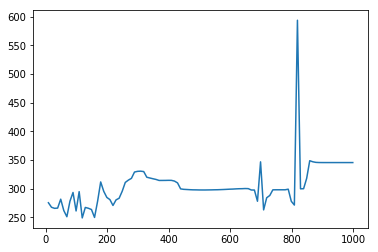

In [8]:
%matplotlib inline
from agents.ddpg.ddpg_agent import DDPGAgent
from agents.ddpg.networks.v0 import create_actor, create_critic
from tasks.hover_task9 import HoverTask
from tasks.task_wrapper import TaskWrapper

env = TaskWrapper(HoverTask(runtime=10.))
n_actions = env.action_space.shape[0]
n_states = env.observation_space.shape[0]
action_high = env.action_space.high
action_low = env.action_space.low
action_range = action_high-action_low
actor, tgt_actor = create_actor(n_states, n_actions, action_range, action_low), create_actor(n_states, n_actions, action_range, action_low)
critic, tgt_critic = create_critic(n_states, n_actions), create_critic(n_states, n_actions)

action_limits = [env.action_space.low, env.action_space.high]

params_v0 = {'actor_lr': 1e-3, 'critic_lr': 1e-3, 'critic_decay': 0, 'tau': 1e-2, 'gamma': 0.99}
agent_v0 = DDPGAgent(actor, tgt_actor, critic, tgt_critic, action_limits, **params)             

agent_v0.train(env, n_episodes=1000, n_steps=200, eval_period=10)
agent_v0.plot_training_scores()
agent_v0.plot_eval_scores()


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Ep   282, steps   29, reward 326.34959, mean 271.75998, best 389.23362, time 1.3s steps/sec   23..

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Ep  1000, steps   25, reward 278.50209, mean 281.07396, best 473.44277, time 0.9s steps/sec   28.
Trained 1000 episodes. Elapsed time: 976.20s. Avg Time per episode: 0.98s


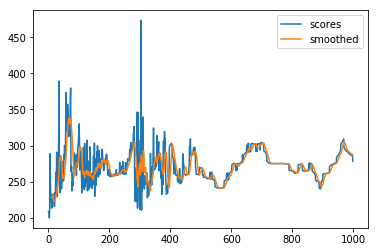

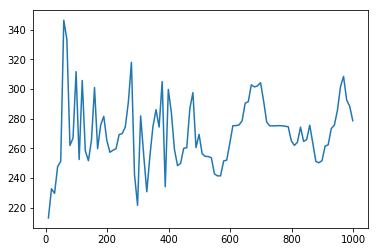

In [9]:
from agents.ddpg.ddpg_agent import DDPGAgent
from agents.ddpg.networks.v1 import create_actor, create_critic
from tasks.hover_task9 import HoverTask
from tasks.task_wrapper import TaskWrapper

env = TaskWrapper(HoverTask(runtime=10.))
n_actions = env.action_space.shape[0]
n_states = env.observation_space.shape[0]
action_high = env.action_space.high
action_low = env.action_space.low
action_range = action_high-action_low
action_limits = [env.action_space.low, env.action_space.high]

actor, tgt_actor = create_actor(n_states, n_actions, action_range, action_low), create_actor(n_states, n_actions, action_range, action_low)
critic, tgt_critic = create_critic(n_states, n_actions), create_critic(n_states, n_actions)

params_v1 = {'actor_lr': 1e-4, 'critic_lr': 1e-3, 'critic_decay': 0, 'tau': 1e-3, 'gamma': 0.99}
agent_v1 = DDPGAgent(actor, tgt_actor, critic, tgt_critic, action_limits, **params)             

agent_v1.train(env, n_episodes=1000, n_steps=200, eval_period=10)
agent_v1.plot_training_scores()
agent_v1.plot_eval_scores()


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Ep   215, steps   28, reward 308.58590, mean 267.62288, best 612.07766, time 1.4s steps/sec   20..

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Ep  1000, steps   39, reward 461.39872, mean 284.72738, best 612.07766, time 1.9s steps/sec   20.
Trained 1000 episodes. Elapsed time: 1428.42s. Avg Time per episode: 1.43s


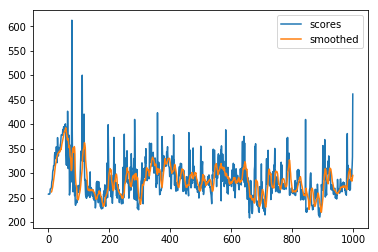

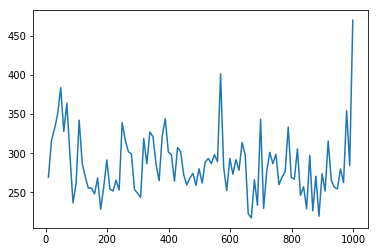

In [10]:
%matplotlib inline
from agents.ddpg.ddpg_agent import DDPGAgent
from agents.ddpg.networks.v2 import create_actor, create_critic
from tasks.hover_task9 import HoverTask
from tasks.task_wrapper import TaskWrapper

env = TaskWrapper(HoverTask(runtime=10.))
n_actions = env.action_space.shape[0]
n_states = env.observation_space.shape[0]
action_high = env.action_space.high
action_low = env.action_space.low
action_range = action_high-action_low
action_limits = [env.action_space.low, env.action_space.high]

actor, tgt_actor = create_actor(n_states, n_actions, action_range, action_low), create_actor(n_states, n_actions, action_range, action_low)
critic, tgt_critic = create_critic(n_states, n_actions), create_critic(n_states, n_actions)

params_v2 = {'actor_lr': 1e-4, 'critic_lr': 1e-3, 'critic_decay': 0, 'tau': 1e-3, 'gamma': 0.99}
agent_v2 = DDPGAgent(actor, tgt_actor, critic, tgt_critic, action_limits, **params)                             

agent_v2.train(env, n_episodes=1000, n_steps=200, eval_period=10)
agent_v2.plot_training_scores()
agent_v2.plot_eval_scores()


Ep  1013, steps   25, reward 270.38223, mean 253.45376, best 612.07766, time 2.0s steps/sec   12.

/Users/pauldickinson/src/dlnd/reinforcement-learning/quadcopter/physics_sim.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Ep  2000, steps   22, reward 227.08886, mean 218.82062, best 612.07766, time 1.1s steps/sec   19.
Trained 1000 episodes. Elapsed time: 1228.36s. Avg Time per episode: 1.23s


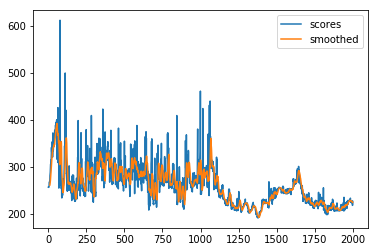

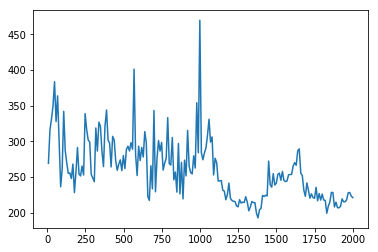

In [11]:

agent_v2.train(env, n_episodes=1000, n_steps=200, eval_period=10)
agent_v2.plot_training_scores()
agent_v2.plot_eval_scores()